In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
pd.options.display.max_columns = None
pd.options.display.expand_frame_repr =False

Read in the data using pandas

In [ ]:
df = pd.read_csv('../data_raw/raw_yield_data.csv')

Take random Sample

In [ ]:
np.random.seed(10)
sample_df = df.sample(n=25)

Glucose for Population and Sample

In [ ]:
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose  = df['Glucose'].max()
sample_mean_glucose = sample_df['Glucose'].mean()
sample_max_glucose  = sample_df['Glucose'].max()

Bar Chart comparing Means

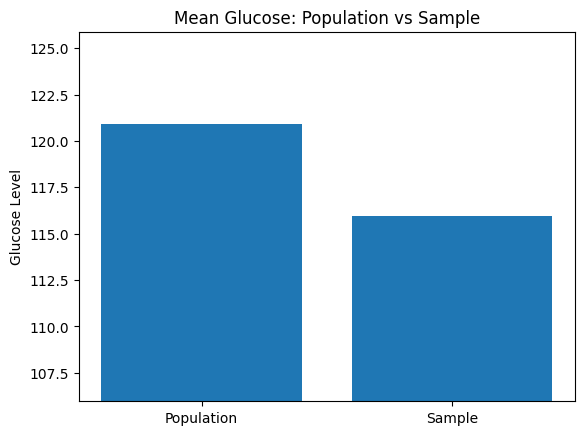

In [77]:
plt.bar(['Population', 'Sample'], [pop_mean_glucose, sample_mean_glucose])
plt.title("Mean Glucose: Population vs Sample")
plt.ylim(sample_mean_glucose - 10, pop_mean_glucose + 5)   # zoom in
plt.ylabel("Glucose Level")
plt.show()

Bar Chart comparing Max values

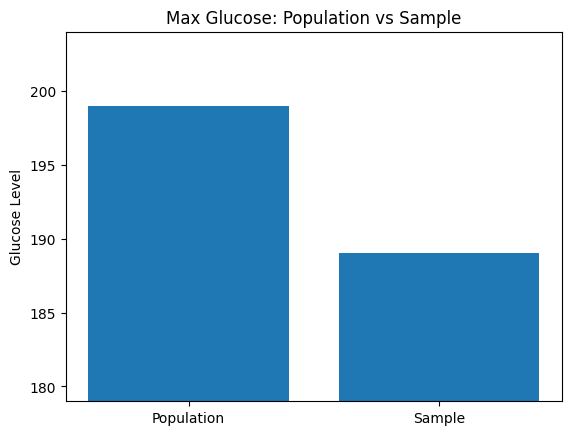

In [78]:
plt.bar(['Population', 'Sample'], [pop_max_glucose, sample_max_glucose])
plt.title("Max Glucose: Population vs Sample")
plt.ylim(sample_max_glucose - 10, pop_max_glucose + 5)
plt.ylabel("Glucose Level")
plt.show()

98th Percentile for Population and Sample

In [79]:
pop_p98_bmi = np.percentile(df['BMI'], 98)
sample_p98_bmi = np.percentile(sample_df['BMI'], 98)

Bar Chart comparing 98th Percentile

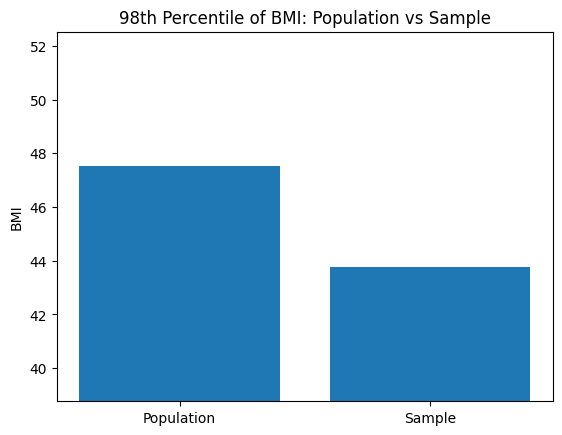

In [80]:
plt.bar(['Population', 'Sample'], [pop_p98_bmi, sample_p98_bmi])
plt.title("98th Percentile of BMI: Population vs Sample")
plt.ylim(sample_p98_bmi - 5, pop_p98_bmi + 5)
plt.ylabel("BMI")
plt.show()

Bootstrap samples statistics

In [81]:
n_boot = 500       # number of bootstrap samples
sample_size = 150  # bootstrap sample size

boot_means = []
boot_stds = []
boot_p98s = []

for i in range(n_boot):
    boot_sample = df['BloodPressure'].sample(sample_size, replace=True)
    
    boot_means.append(boot_sample.mean())
    boot_stds.append(boot_sample.std())
    boot_p98s.append(np.percentile(boot_sample, 98))

# Convert to array
boot_means = np.array(boot_means)
boot_stds  = np.array(boot_stds)
boot_p98s  = np.array(boot_p98s)

# Averages for bootstrap
boot_mean_avg = boot_means.mean()
boot_std_avg  = boot_stds.mean()
boot_p98_avg  = boot_p98s.mean()

Population statistics

In [82]:
pop_mean = df['BloodPressure'].mean()
pop_std  = df['BloodPressure'].std()
pop_p98  = np.percentile(df['BloodPressure'], 98)

Mean comparison

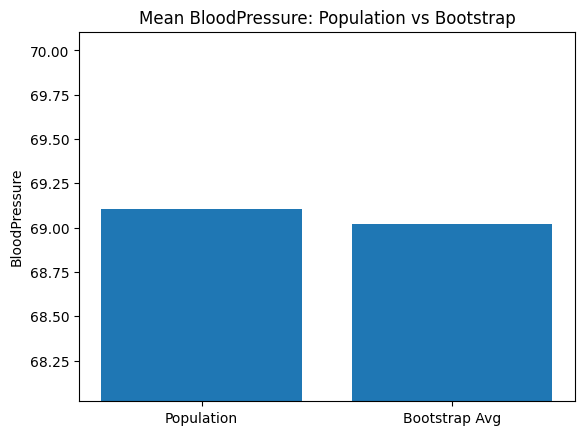

Population Mean: 69.10546875

Bootstrap Average Mean: 69.02028


In [83]:
plt.bar(['Population', 'Bootstrap Avg'], [pop_mean, boot_mean_avg])
plt.title("Mean BloodPressure: Population vs Bootstrap")
plt.ylim(boot_mean_avg - 1, pop_mean + 1)
plt.ylabel("BloodPressure")
plt.show()
print("Population Mean:", pop_mean)
print("\nBootstrap Average Mean:", boot_mean_avg)

Standard deviation comparison

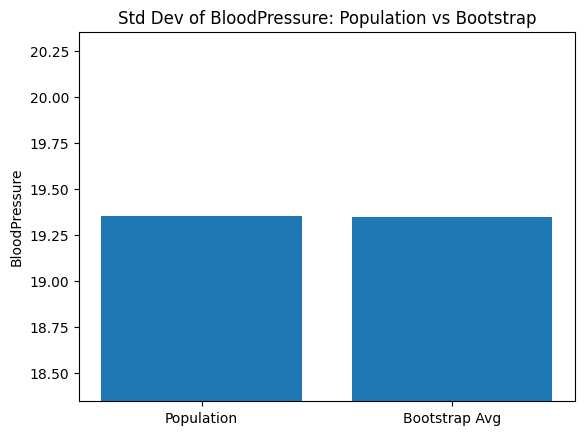

Population Std: 19.355807170644777
Bootstrap Average Std: 19.347708631067214


In [84]:
plt.bar(['Population', 'Bootstrap Avg'], [pop_std, boot_std_avg])
plt.title("Std Dev of BloodPressure: Population vs Bootstrap")
plt.ylim(boot_std_avg - 1, pop_std + 1)
plt.ylabel("BloodPressure")
plt.show()
print("Population Std:", pop_std)
print("Bootstrap Average Std:", boot_std_avg)


98 Percentile comparison

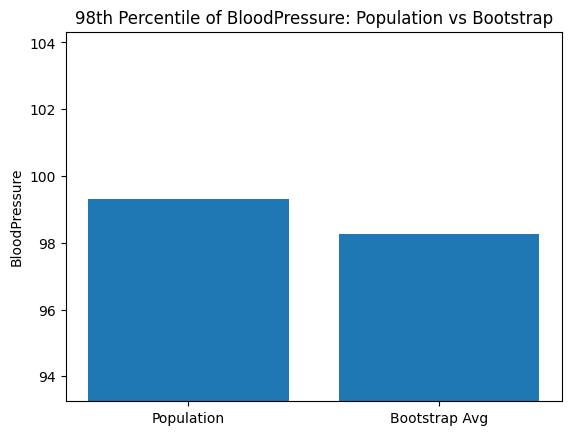

Population 98th Percentile: 99.31999999999994
Bootstrap Average 98th Percentile: 98.25332000000002


In [85]:
plt.bar(['Population', 'Bootstrap Avg'], [pop_p98, boot_p98_avg])
plt.title("98th Percentile of BloodPressure: Population vs Bootstrap")
plt.ylim(boot_p98_avg - 5, pop_p98 + 5)
plt.ylabel("BloodPressure")
plt.show()
print("Population 98th Percentile:", pop_p98)
print("Bootstrap Average 98th Percentile:", boot_p98_avg)

Finding Report:

Mean: Bootstrap = 69.02, Population = 69.11

Standard Deviation: Bootstrap = 19.35, Population = 19.36

98th Percentile: Bootstrap = 98.25, Population = 99.32

The results show that the bootstrap method provides estimates very close to the population values. The mean and standard deviation are almost identical. The 98th percentile is slightly lower in the bootstrap samples. Overall, bootstrap sampling provides reliable estimates of the population.